Uncertainty ratios

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.patches import Rectangle

In [5]:
# Moon parameters
moon_radius_km = 1737.4

In [6]:
desired_grid_size_km = 6.25
increment=desired_grid_size_km/30.325
#1 degree=30.325km
#1km=1/30.325km
print(increment)
# lat_bin_size = 1
lat_bin_size=increment##### check for what should be the bin size

0.20610057708161583


In [7]:
import os
import pandas as pd

# Define the base path and folders
base_path = r"C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized"
folders = ["2019","2020","2021","2022","2023","2024"]  # List of folders to process

# Initialize an empty list to store DataFrames
data_frames = []

# Loop through each folder and collect CSV files
for folder in folders:
    # Get the full path to the folder
    folder_path = os.path.join(base_path, folder)
    
    # Check if the folder exists
    if os.path.exists(folder_path):
        print(f"Folder found: {folder_path}")
        
        # List all files in the folder
        for file in os.listdir(folder_path):
            # Check if the file is a CSV file
            if file.endswith(".csv"):
                file_path = os.path.join(folder_path, file)  # Full path to the file
                print(f"Reading file: {file_path}")
                
                # Try to read the CSV file
                try:
                    data_frames.append(pd.read_csv(file_path))
                except Exception as e:
                    print(f"Error reading file {file}: {e}")
    else:
        print(f"Folder not found: {folder_path}")

# Check if there are any DataFrames to concatenate
if data_frames:
    # Concatenate all DataFrames into a single DataFrame
    data = pd.concat(data_frames, ignore_index=True)
    print(f"Total rows in combined DataFrame: {len(data)}")
    
    # Apply the longitude filter
    data = data[abs(data['Longitude_1'] - data['Longitude_3']) < 180]
    print(f"Rows after longitude filter: {len(data)}")
else:
    print("No CSV files found in the specified folders.")
    data = pd.DataFrame()  # Create an empty DataFrame to avoid further errors

# Save the resulting DataFrame (optional)
output_file = "processed_data.csv"
if not data.empty:
    data.to_csv(output_file, index=False)
    print(f"Processed data saved to {output_file}")
else:
    print("No data to save.")


Folder found: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2019
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2019\09.csv
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2019\10.csv
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2019\11.csv
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2019\12.csv
Folder found: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2020
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2020\01.csv
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2020\02.csv
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2020\03.c

In [8]:
import os
import pandas as pd

def process_data(base_path, folders):
    """
    This function processes CSV files from the given base_path and folder list.
    - Loops through the folders and reads CSV files.
    - Filters data based on longitude and combines all files into one DataFrame.
    
    Parameters:
    base_path (str): The base directory path where the folders are located.
    folders (list): List of folders to process inside the base_path.
    
    Returns:
    pd.DataFrame: The combined DataFrame containing processed data.
    """
    data_frames = []  # Initialize an empty list to store DataFrames

    # Loop through each folder and collect CSV files
    for folder in folders:
        folder_path = os.path.join(base_path, folder)  # Full path to the folder
        
        if os.path.exists(folder_path):  # Check if the folder exists
            print(f"Folder found: {folder_path}")
            
            # List all files in the folder
            for file in os.listdir(folder_path):
                if file.endswith(".csv"):  # Check if the file is a CSV file
                    file_path = os.path.join(folder_path, file)  # Full path to the file
                    print(f"Reading file: {file_path}")
                    
                    try:
                        data_frames.append(pd.read_csv(file_path))  # Try reading the CSV file
                    except Exception as e:
                        print(f"Error reading file {file}: {e}")
        else:
            print(f"Folder not found: {folder_path}")
    
    # Check if there are any DataFrames to concatenate
    if data_frames:
        # Concatenate all DataFrames into a single DataFrame
        data = pd.concat(data_frames, ignore_index=True)
        print(f"Total rows in combined DataFrame: {len(data)}")
        
        # Apply the longitude filter
        data = data[abs(data['Longitude_1'] - data['Longitude_3']) < 180]
        print(f"Rows after longitude filter: {len(data)}")
    else:
        print("No CSV files found in the specified folders.")
        data = pd.DataFrame()  # Create an empty DataFrame to avoid further errors
    
    return data  # Return the processed data

# Define the base path and folders at the end of the code
base_path = r"C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized"
folders = ["2019","2020","2021","2022","2023","2024"]  # List of folders to process

# Call the function to process the data
data = process_data(base_path, folders)

# Save the resulting DataFrame (optional)
output_file = "processed_data.csv"
if not data.empty:
    data.to_csv(output_file, index=False)
    print(f"Processed data saved to {output_file}")
else:
    print("No data to save.")


Folder found: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2019
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2019\09.csv
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2019\10.csv
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2019\11.csv
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2019\12.csv
Folder found: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2020
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2020\01.csv
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2020\02.csv
Reading file: C:\Users\Pearl Narang\Documents\xrf_line_catalog\xrf_line_catalog_power_law_normalized\2020\03.c

In [9]:
len(data)

43690

In [10]:

# Drop rows with null values for Mg and Si amplitudes
data = data.dropna(subset=["Peak_Amplitude@Mg", "Peak_Amplitude@Si"])

data = data[(data['Peak_Amplitude@Si'] >10) & 
                    ((data['Peak_Amplitude@Mg'] / data['Peak_Amplitude@Si']) <= 2)]

# Calculate the Mg/Si ratio
data["Mg_Si_Ratio"] = data["Peak_Amplitude@Mg"] / data["Peak_Amplitude@Si"]

# Columns for latitudes and longitudes
lat_cols = ["Latitude_1", "Latitude_2", "Latitude_3", "Latitude_4"]
lon_cols = ["Longitude_1", "Longitude_2", "Longitude_3", "Longitude_4"]

# Print the maximum Mg/Si ratio
print("Maximum Mg/Si Ratio:", max(data["Mg_Si_Ratio"]))

# Flatten lat/lon values for bounding box calculations
latitudes = data[lat_cols].values.flatten()
longitudes = data[lon_cols].values.flatten()

# Optional: Save the processed data to a new CSV
data.to_csv("processed_data.csv", index=False)


Maximum Mg/Si Ratio: 1.90283137996842


In [11]:
len(data)

37854

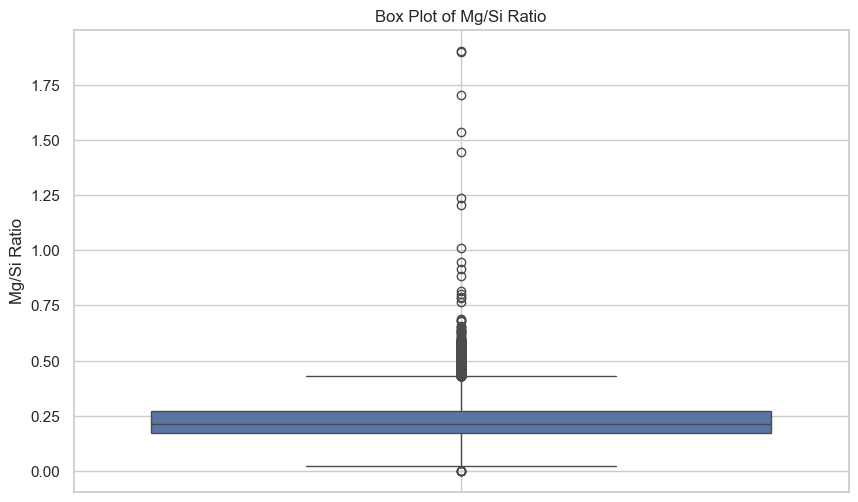

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")
# Create a box plot for the Mg/Si ratio
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Mg_Si_Ratio'])
plt.title('Box Plot of Mg/Si Ratio')
plt.ylabel('Mg/Si Ratio')
plt.grid(True)
plt.show()

In [ ]:


# Optional: Check how many rows remain after removing the max value
print(f"Rows remaining after removing max value: {len(data)}")



Rows remaining after removing max value: 37854


In [19]:
# Latitude and longitude range
# lat_min, lat_max = np.floor(np.min(latitudes)), np.ceil(np.max(latitudes))
# lon_min, lon_max = np.floor(np.min(longitudes)), np.ceil(np.max(longitudes))
lat_min, lat_max =-90, 90
lon_min, lon_max = -180,180
lat_bins = np.arange(lat_min, lat_max + lat_bin_size, lat_bin_size)

In [20]:
# Function to calculate km per degree of longitude for a given latitude range
def avg_km_per_degree_lon(lat1, lat2):
    avg_cos = np.mean([np.cos(np.radians(lat)) for lat in np.linspace(lat1, lat2, 100)])
    return (2 * np.pi * moon_radius_km / 360) * avg_cos


In [21]:
# Create the grid
grid_lines = []
for i in range(len(lat_bins) - 1):
    lat1, lat2 = lat_bins[i], lat_bins[i + 1]
    avg_km_lon = avg_km_per_degree_lon(lat1, lat2)
    lon_step_size = desired_grid_size_km / avg_km_lon
    lon_bins = np.arange(lon_min, lon_max + lon_step_size, lon_step_size)
    grid_lines.append((lat1, lat2, lon_bins))
# Initialize sum and count grids
grid_sum = np.zeros((len(lat_bins) - 1, max(len(lon_bins) for _, _, lon_bins in grid_lines)))
grid_count = np.zeros_like(grid_sum)

storing data in csv

In [31]:
import pandas as pd
import numpy as np

# Initialize a dictionary to hold grid data for faster lookup
grid_data = {}

# Assign data to the grid
for index, row in data.iterrows():
    # Extract latitude and longitude vertices
    lat_values = row[lat_cols].values
    lon_values = row[lon_cols].values
    mg_si_ratio = row["Mg_Si_Ratio"]

    # Calculate the min and max latitude and longitude for the area covered by the vertices
    lat_min, lat_max = lat_values.min(), lat_values.max()
    lon_min, lon_max = lon_values.min(), lon_values.max()

    if abs(lon_max - lon_min) > 180:  # Skip invalid longitude ranges
        continue

    # Iterate through each latitude grid row
    for i, (lat1, lat2, lon_bins) in enumerate(grid_lines):
        if lat1 < lat_max and lat2 > lat_min:  # Latitude overlap
            # Determine the longitude indices that overlap with the area
            lon_start_idx = np.clip(np.digitize(lon_min, lon_bins) - 1, 0, len(lon_bins) - 2)
            lon_end_idx = np.clip(np.digitize(lon_max, lon_bins) - 1, 0, len(lon_bins) - 2)

            for j in range(lon_start_idx, lon_end_idx + 1):
                if 0 <= j < len(lon_bins) - 1:
                    # Generate a unique key for each grid cell
                    cell_key = (i, j)

                    # Initialize the grid cell if it doesn't exist
                    if cell_key not in grid_data:
                        grid_data[cell_key] = {
                            "Latitude_1": lat1,
                            "Longitude_1": lon_bins[j],
                            "Latitude_2": lat1,
                            "Longitude_2": lon_bins[j + 1],
                            "Latitude_3": lat2,
                            "Longitude_3": lon_bins[j + 1],
                            "Latitude_4": lat2,
                            "Longitude_4": lon_bins[j],
                            "Initial_Values": []
                        }

                    # Append the Mg/Si ratio to the grid cell's values
                    grid_data[cell_key]["Initial_Values"].append(mg_si_ratio)

# Calculate averages and SEM for each grid cell
for cell_key, entry in grid_data.items():
    initial_values = np.array(entry["Initial_Values"])
    entry["Numbers"] = len(initial_values)
    
    if entry["Numbers"] > 1:
        avg_value = np.mean(initial_values)
        sem_value = np.std(initial_values) * 100 / (np.sqrt(entry["Numbers"]) * avg_value)
        entry["Average_Value"] = avg_value
        entry["SEM(Mg/Si)"] = sem_value
    else:
        entry["Average_Value"] = np.nan
        entry["SEM(Mg/Si)"] = np.nan

# Create a DataFrame from the grid data
grid_df = pd.DataFrame.from_dict(grid_data, orient="index")

# Save to CSV
grid_df.to_csv("grid_cell_values_Mg_Si_optimized.csv", index=False)

# Optional: Display the DataFrame to check the output
print(grid_df.head())


          Latitude_1  Longitude_1  Latitude_2  Longitude_2  Latitude_3  \
253 1151  -37.856554   120.049528  -37.856554   120.310214  -37.650453   
    1152  -37.856554   120.310214  -37.856554   120.570900  -37.650453   
    1153  -37.856554   120.570900  -37.856554   120.831585  -37.650453   
    1154  -37.856554   120.831585  -37.856554   121.092271  -37.650453   
    1155  -37.856554   121.092271  -37.856554   121.352957  -37.650453   

          Longitude_3  Latitude_4  Longitude_4  \
253 1151   120.310214  -37.650453   120.049528   
    1152   120.570900  -37.650453   120.310214   
    1153   120.831585  -37.650453   120.570900   
    1154   121.092271  -37.650453   120.831585   
    1155   121.352957  -37.650453   121.092271   

                                             Initial_Values  Numbers  \
253 1151          [0.19382217159833126, 0.1701430334798446]        2   
    1152  [0.19382217159833126, 0.1701430334798446, 0.18...        4   
    1153  [0.19382217159833126, 0.1701

In [32]:
grid_df['SEM(Mg/Si)'].max()

70.71067811865471

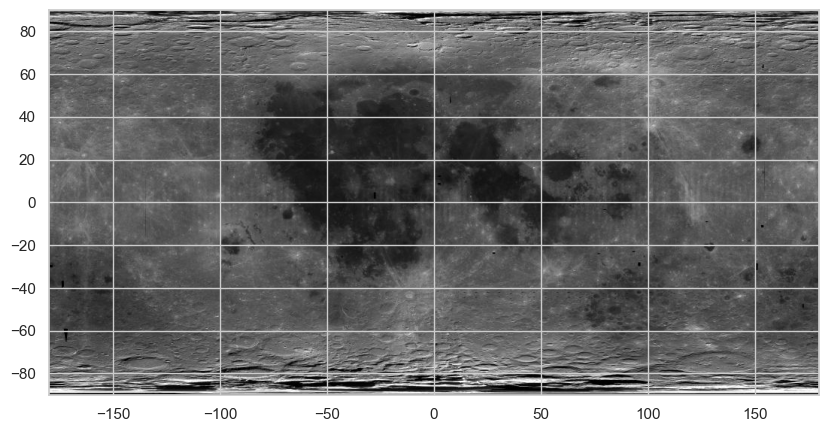

In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.patches import Rectangle
import matplotlib.image as mpimg
from PIL import Image

# Load the background image (replace "lunar_map.jpg" with your actual file)
background_img = Image.open("lunar_map.jpg").convert("RGB")

# Define the extent of the image (longitude and latitude range for the lunar map)
# Adjust these values to match the geographical bounds of the lunar image.
image_extent = [-180, 180, -90, 90]  # [lon_min, lon_max, lat_min, lat_max]

# Display the background image
plt.figure(figsize=(10, 5))
plt.imshow(background_img, extent=image_extent)
plt.axis('on')  # Optional: turn on the axis
plt.show()


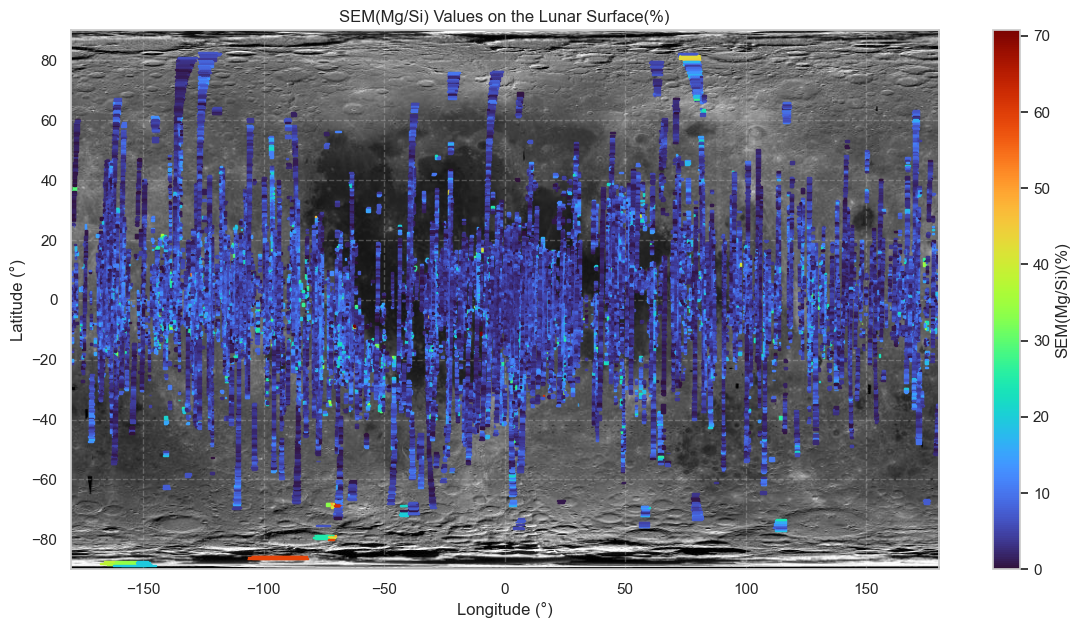

In [34]:
# Create the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Normalize SEM(Mg) values
norm = Normalize(vmin=grid_df["SEM(Mg/Si)"].min(), vmax=grid_df["SEM(Mg/Si)"].max())
cmap = plt.cm.turbo # Choose a perceptually uniform colormap
ax.imshow(background_img, extent=image_extent, aspect='auto')
# Plot each grid cell directly from the CSV
for _, row in grid_df.iterrows():
    if not np.isnan(row["SEM(Mg/Si)"]):  # Skip cells with NaN values
        rect = Rectangle(
            (row["Longitude_1"], row["Latitude_1"]),  # Bottom-left corner
            row["Longitude_3"] - row["Longitude_1"],  # Width (longitude range)
            row["Latitude_3"] - row["Latitude_1"],    # Height (latitude range)
            color=cmap(norm(row["SEM(Mg/Si)"])),
            alpha=1,
        )
        ax.add_patch(rect)

# Configure plot
ax.set_xlim(-180, 180)  # Adjust to your grid's longitude range
ax.set_ylim(-90, 90)    # Adjust to your grid's latitude range
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")
ax.set_title("SEM(Mg/Si) Values on the Lunar Surface(%)")

# Add a color bar
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="SEM(Mg/Si)(%)")

# Add optional gridlines
plt.grid(True, linestyle="--", alpha=0.3)

# Show the plot
plt.show()


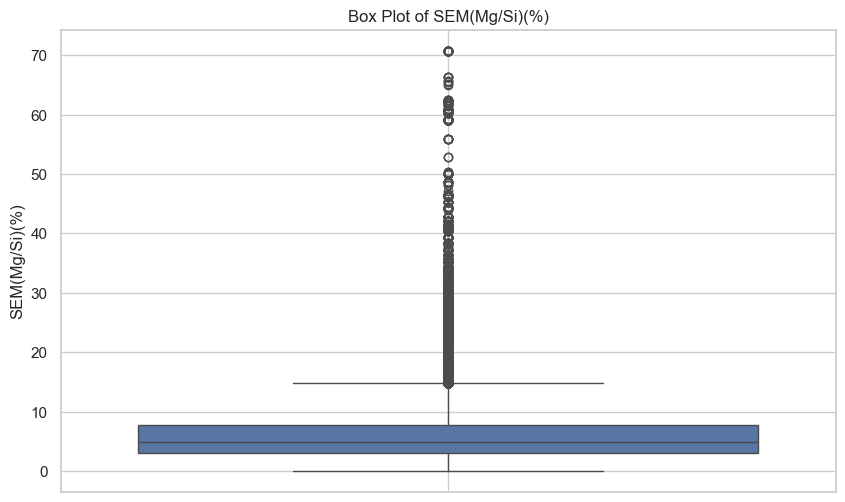

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")
# Create a box plot for the Mg/Si ratio
plt.figure(figsize=(10, 6))
sns.boxplot(y=grid_df['SEM(Mg/Si)'])
plt.title('Box Plot of SEM(Mg/Si)(%)')
plt.ylabel('SEM(Mg/Si)(%)')
plt.grid(True)
plt.show()